### Задание по программированию: Бэггинг и случайный лес

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection, ensemble
from sklearn.tree import DecisionTreeClassifier as dtc
from matplotlib import pyplot as plt

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

In [2]:
data = datasets.load_digits()
X, y = data['data'], data['target']

X.shape, y.shape

((1797, 64), (1797,))

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation* с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

*библиотека sklearn.cross_validation устарела и заменена на sklearn.model_selection

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

##### Задание 1
Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [3]:
# Устанавливаем количество фолдов равным десяти
cv = 10 

# Измеряем качество работы дерева решений с настройками по умолчанию на кросс-валидации
answer1 = model_selection.cross_val_score(dtc(), X, y, cv=cv).mean()
print(answer1)

0.8265134267067511


##### Задание 2
Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [4]:
# Создаем модель BaggingClassifier с количеством деревьем равным ста
cls = ensemble.BaggingClassifier(base_estimator=dtc(), n_estimators=100)

# Измеряем качество работы ансамбля на кросс-валидации
answer2 = model_selection.cross_val_score(cls, X, y, cv=cv).mean()
print(answer2)

0.9175927358497639


##### Задание 3
Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на корне из d случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [5]:
# Создаем модель BaggingClassifier с количеством деревьем равным ста и с уменьшенным 
# количеством признаков для обучения

n_feats = int(X.shape[1] ** 0.5)
cls = ensemble.BaggingClassifier(base_estimator=dtc(), n_estimators=100, max_features=n_feats)

# Измеряем качество работы ансамбля на кросс-валидации
answer3 = model_selection.cross_val_score(cls, X, y, cv=cv).mean()
print(answer3)

0.9377468267738118


##### Задание 4
Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же корень из d признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [6]:
# Создаем модель BaggingClassifier с количеством деревьем равным ста и с уменьшенным 
# количеством признаков для обучения

cls = ensemble.BaggingClassifier(base_estimator=dtc(max_features='sqrt'), n_estimators=100)

# Измеряем качество работы ансамбля на кросс-валидации
answer4 = model_selection.cross_val_score(cls, X, y, cv=cv).mean()
print(answer4)

0.9544070114940038


##### Задание 5

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [7]:
cls = ensemble.RandomForestClassifier(n_estimators=100)
print("Качество работы случайного леса:", model_selection.cross_val_score(cls, X, y, cv=cv).mean())

Качество работы случайного леса: 0.9572131088001283


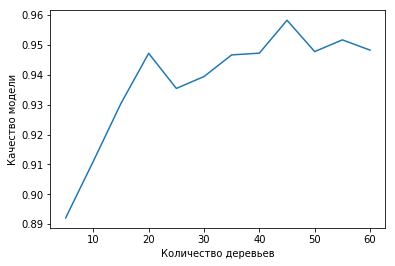

In [8]:
%matplotlib inline
x_axis = [i for i in range(5, 61, 5)]
y_axis = []
for i in x_axis:
    cls = ensemble.RandomForestClassifier(n_estimators=i)
    y_axis.append(model_selection.cross_val_score(cls, X, y, cv=cv).mean())
plt.plot(x_axis, y_axis);
plt.xlabel('Количество деревьев');
plt.ylabel('Качество модели');

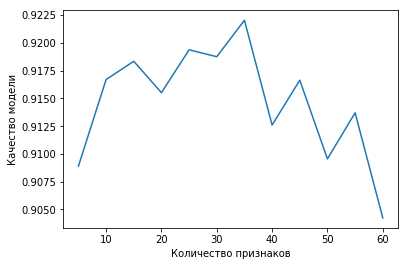

In [9]:
y_axis = []
for i in x_axis:
    cls = ensemble.RandomForestClassifier(max_features=i)
    y_axis.append(model_selection.cross_val_score(cls, X, y, cv=cv).mean())
plt.plot(x_axis, y_axis);
plt.xlabel('Количество признаков');
plt.ylabel('Качество модели');

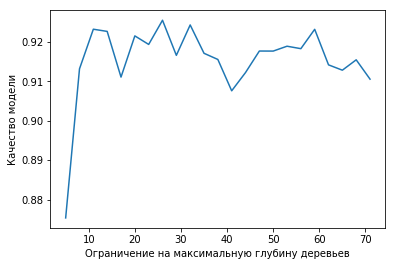

In [10]:
x_ = [i for i in range(5, 73, 3)]
y_ = []
for i in x_:
    cls = ensemble.RandomForestClassifier(max_depth=i)
    y_.append(model_selection.cross_val_score(cls, X, y, cv=cv).mean())
plt.plot(x_, y_);
plt.xlabel('Ограничение на максимальную глубину деревьев');
plt.ylabel('Качество модели');

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [11]:
answer5 = '2 3 4 7'

In [12]:
ans = answer1, answer2, answer3, answer4, answer5
for i in range(1, 6):
    with open('ans' + str(i) + '.txt', 'w') as f:
        f.write(str(ans[i-1]))